# Mini project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning. The cleansing of this dataset will be a great start for you to further play with this Kaggle Competition if you have more interest and time.

This step-by-step mini project will illustrate you various ways to impute missing values.

In [321]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for heatmap graph
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [322]:
properties = pd.read_csv('properties_2016.csv')
train =pd.read_csv('train_2016_v2.csv')

/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [325]:
df_train = train.merge(properties,how='left',on ='parcelid')
df_train.drop(['parcelid','transactiondate'],axis=1,inplace=True)

In [327]:
df_train.shape

(90275, 58)

In [320]:
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [328]:
missing_df= df_train.isnull().sum().reset_index() # reset_index to create a df
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']> 0]
missing_df= missing_df.sort_values(by ='missing_count')

#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

<img src="missing_value_barplot.png" alt="Drawing" style="width: 600px;"/>

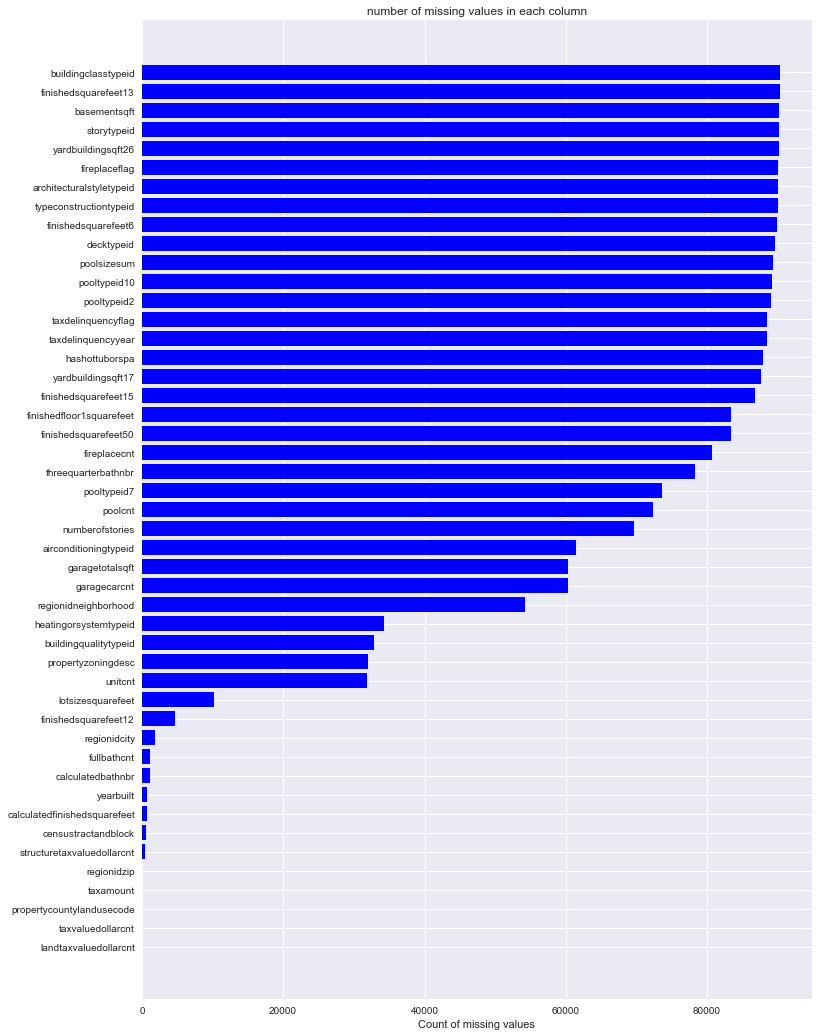

In [37]:
# first draw bars then label
ind = np.arange(missing_df.shape[0]) # set colmnames length as the length of y-axis on graph
width = 0.9 # bar width
fig, ax = plt.subplots(figsize=(12,18))
rects= ax.barh(ind,missing_df.missing_count.values,color='blue')  # horizontal bar(bar location, values)
ax.set_yticks(ind) # provide an index for each bar
ax.set_yticklabels(missing_df.column_name.values,rotation='horizontal')# label bars into corresponding position
ax.set_xlabel('Count of missing values')
ax.set_title('number of missing values in each column')
plt.show()

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [329]:
# check data types
df_train.dtypes
for i in range(len(df_train.dtypes)):
    print (df_train.index[i],df_train.dtypes[i])

0 float64
1 float64
2 float64
3 float64
4 float64
5 float64
6 float64
7 float64
8 float64
9 float64
10 float64
11 float64
12 float64
13 float64
14 float64
15 float64
16 float64
17 float64
18 float64
19 float64
20 float64
21 float64
22 object
23 float64
24 float64
25 float64
26 float64
27 float64
28 float64
29 float64
30 float64
31 float64
32 object
33 float64
34 object
35 float64
36 float64
37 float64
38 float64
39 float64
40 float64
41 float64
42 float64
43 float64
44 float64
45 float64
46 float64
47 float64
48 float64
49 object
50 float64
51 float64
52 float64
53 float64
54 float64
55 object
56 float64
57 float64


In [330]:
# create a list for all numeric  var
num_vars1 = list(df_train.dtypes[df_train.dtypes=='float64'].index)
num_vars1

['logerror',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landt

In [331]:
# list of ids and zipcode to be removed
remo_list=['pooltypeid10','pooltypeid2','pooltypeid7','airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid','buildingqualitytypeid','decktypeid','heatingorsystemtypeid','propertylandusetypeid','regionidzip','storytypeid','typeconstructiontypeid']
remo_list

['pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'heatingorsystemtypeid',
 'propertylandusetypeid',
 'regionidzip',
 'storytypeid',
 'typeconstructiontypeid']

In [114]:
# remove id and zipcodes from num_vars
numcols= [x for x in num_vars1 if x not in remo_list]
numcols

['logerror',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'censustractandblock']

In [333]:
# create a list for categorical var
catcols =[x for x in df_train.columns if x not in numcols]
catcols

['airconditioningtypeid',
 'architecturalstyletypeid',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'regionidzip',
 'storytypeid',
 'typeconstructiontypeid',
 'fireplaceflag',
 'taxdelinquencyflag']

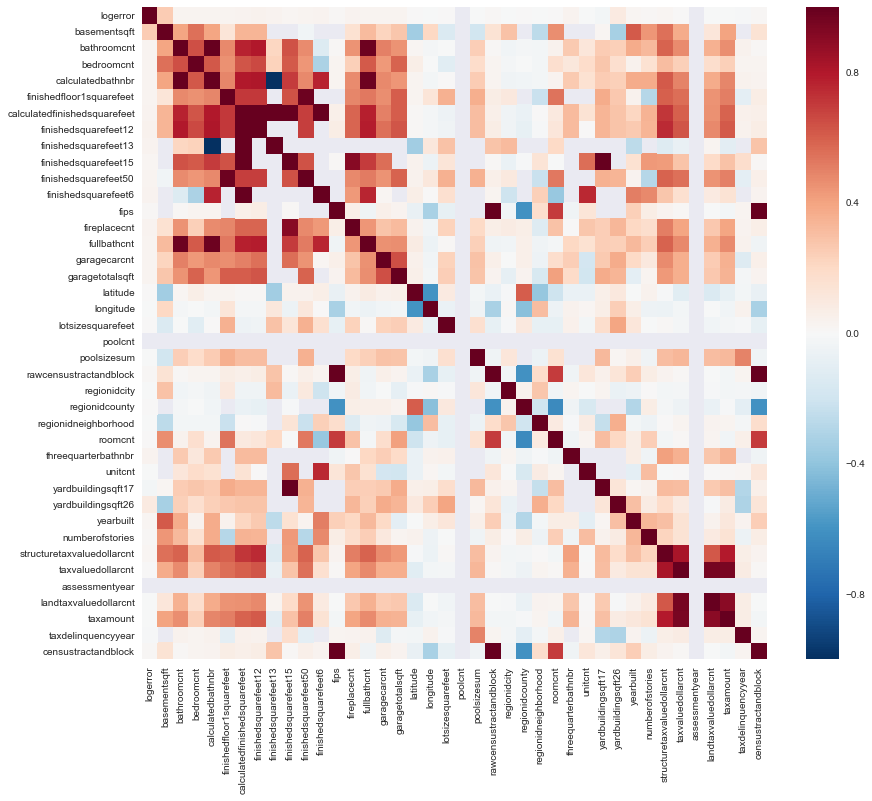

In [334]:
plt.figure(figsize=(14,12))
sns.heatmap(data=df_train[numcols].corr()) # corr() only evaluates linear correlation 
plt.show()
%matplotlib inline

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [335]:
dropcols=[]
## 'calculatedfinishedsquarefeet' has strong correlation with 'finishedsquarefeet12','finishedsquarefeet13',
## 'finishedsquarefeet15','finishedsquarefeet6'
## But 'calculatedfinishedsquarefeet' has very few missing values
## Therefore, only drop 'finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet6'
dropcols.append('finishedsquarefeet12')
dropcols.append('finishedsquarefeet13')
dropcols.append('finishedsquarefeet15')
dropcols.append('finishedsquarefeet6')

In [336]:
## 'finishedsquarefeet50' has strong corr with 'finishedfloor1squarefeet'
## they have the same amount of missing values, can remove either one
## remove 'finishedsquarefeet50'
dropcols.append('finishedsquarefeet50')

In [337]:
## 'bathroomcnt' has strong corr with 'calculatedbathnbr','fullbathcnt'
## keep 'bathroomcnt' for having less missing values
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [338]:
index = df_train.hashottuborspa.isnull()
df_train.loc[index,'hashottuborspa'] = 'None'

In [339]:
df_train.hashottuborspa.isnull().sum()

0

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [ ]:
# what is the difference between df_train[columns] vs df_train.columns?

In [340]:
df_train['pooltypeid10'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: pooltypeid10, dtype: float64

In [341]:
index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2'] = 0

In [342]:
index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

In [343]:
index = df_train.pooltypeid10.isnull()
df_train.loc[index,'pooltypeid10'] = 0

In [344]:
index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0

(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [345]:
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index,'taxdelinquencyflag']= 0

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [346]:
index = df_train.garagecarcnt.isnull()
df_train.loc[index,'garagecarcnt'] = 0

In [347]:
index = df_train.garagetotalsqft.isnull()
df_train.loc[index,'garagetotalsqft'] = 0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [348]:
# fill NA poolsizesum with its median 
# loc takes label,[rows, cols] ,  iloc takes index position
poolsizesum_median = df_train.loc[df_train['poolcnt']>0, 'poolsizesum'].median()
df_train.loc[(df_train['poolcnt']>0) & (df_train['poolsizesum'].isnull()),'poolsizesum'] = poolsizesum_median

# if no pool them poolsizesum = 0 
df_train.loc[df_train['poolcnt']==0,'poolsizesum'] =0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [349]:
# or first set df_train['fireplaceflag'] = 'No'; then update yes on top of this 
df_train.loc[df_train['fireplacecnt'] > 0, 'fireplaceflag'] == 'Yes'
df_train.loc[df_train['fireplacecnt'] <=0,'fireplaceflag' ]=='No'

index = df_train.fireplacecnt.isnull()
df_train.loc[index,'fireplacecnt'] = 0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [353]:
# check the most common value in column 'airconditioningtypeid'
from collections import Counter 
count=Counter(df_train['airconditioningtypeid'])
count.most_common()

[(1.0, 26668),
 (13.0, 1833),
 (5.0, 215),
 (11.0, 63),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1)

In [354]:
index = df_train.airconditioningtypeid.isnull()
df_train.loc[index, 'airconditioningtypeid'] = 1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [355]:
index = df_train.heatingorsystemtypeid.isnull()
df_train.loc[index, 'heatingorsystemtypeid'] = 2                                         

In [356]:
# check which var in catcols could be treated the same way
catcols

['airconditioningtypeid',
 'architecturalstyletypeid',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'regionidzip',
 'storytypeid',
 'typeconstructiontypeid',
 'fireplaceflag',
 'taxdelinquencyflag']

In [259]:
from collections import Counter 
Counter(df_train['buildingqualitytypeid']).most_common()

[(7.0, 29310),
 (4.0, 23839),
 (1.0, 2627),
 (10.0, 1461),
 (12.0, 119),
 (8.0, 5),
 (6.0, 2),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (n

In [357]:
# 7 is the most frequent, replace missing value in 'buildingqualitytypeid' with 7
index = df_train.buildingqualitytypeid.isnull()
df_train.loc[index, 'buildingqualitytypeid'] = 7   

In [358]:
df_train.buildingqualitytypeid.isnull().sum(0)

0

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [ ]:
# Normally what is the preferable range for the threshold in work place??
# Is it betetr if we do Question(10) first, then try to fill in NA's for all the rest? 
# 我们是否要保证处理完NA之后的df一个missing value 都没？ 否则继续对missing value进行更多处理直到全部都被解决掉？

In [359]:
df_train.isnull().sum()

logerror                            0
airconditioningtypeid               0
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid               0
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                        0
fullbathcnt                      1182
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid               0
latitude                            0
longitude                           0
lotsizesquar

In [360]:
len(df_train)

90275

In [361]:
missingvalue_prop = (df_train.isnull().sum()/len(df_train)).reset_index() # 每个col missing value占所有observations的 proportion
missingvalue_prop.columns = ['field','proportion']
missingvalue_prop = missingvalue_prop.sort_values(by = 'proportion',ascending= False)
missingvaluescols = missingvalue_prop[missingvalue_prop['proportion'] > 0.97].field.tolist() # tolist: convert array to list
missingvaluescols
dropcols = dropcols + missingvaluescols # list addition
df_train = df_train.drop(dropcols, axis = 1)


In [362]:
df_train.shape

(90275, 41)

In [294]:
df_train.isnull().sum() 

logerror                            0
airconditioningtypeid               0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
fips                                0
fireplacecnt                        0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid               0
latitude                            0
longitude                           0
lotsizesquarefeet               10150
poolcnt                             0
poolsizesum                         0
pooltypeid10                        0
pooltypeid2                         0
pooltypeid7                         0
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31962
rawcensustractandblock              0
regionidcity                     1803
regionidcoun

#### 11. We can also use some machine learning algorithm to fill the missing data. (you can skip this if you feel so difficult)
In this dataset, there's quite a few variables which are probably dependant on longtitude and latitude data. It is reasonable to fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information).

You don't need to understand the following code, just consider this as a function you can use directly. The following code comes from the link:
https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

In [363]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Works on categorical feature
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

### Example: 
### If you want to impute buildingqualitytypeid with geological information:
"""
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )
"""

## Works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return

**Find out some features you can use this knn to fill the missing data, and use the above funtion to impute them**

In [364]:
# fill 'regionidcity'
fillna_knn( df= df_train, 
            base = ['latitude','longitude'],
            target = 'regionidcity',fraction =0.15, n_neighbors =1 )

fitting
the shape of active features:  (170,)
predicting
writing result to df
num of unperdictable data:  2.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [365]:
# 'regionidneighborhood' 
fillna_knn( df= df_train, 
            base = ['latitude','longitude'],
            target = 'regionidneighborhood',fraction =0.15, n_neighbors =1 )

fitting
the shape of active features:  (379,)
predicting
writing result to df
num of unperdictable data:  245.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [366]:
# 'regionidzip'
fillna_knn( df= df_train, 
            base = ['latitude','longitude'],
            target = 'regionidzip',fraction =0.15, n_neighbors =1 )

fitting
the shape of active features:  (381,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [367]:
# 'yearbuilt'
fillna_knn( df= df_train, 
            base = ['latitude','longitude'],
            target = 'yearbuilt',fraction =0.15, n_neighbors =1 )

fitting
the shape of active features:  (124,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [368]:
df_train.isnull().sum()

logerror                            0
airconditioningtypeid               0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
fips                                0
fireplacecnt                        0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid               0
latitude                            0
longitude                           0
lotsizesquarefeet               10150
poolcnt                             0
poolsizesum                         0
pooltypeid10                        0
pooltypeid2                         0
pooltypeid7                         0
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31962
rawcensustractandblock              0
regionidcity                        0
regionidcoun